In [1]:
#IMPORTING PACKAGES
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#import dataset
df=pd.read_csv("D:\\Personal\\Codercave DS Intern\\Customer Transactional Data analysis\\Hackathon_Working_Data.csv")

In [3]:
#BASIC EDA
#info dataset
print("Dimension of dataset:", df.shape)
print(df.info())

Dimension of dataset: (26985, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26985 entries, 0 to 26984
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MONTH      26985 non-null  object 
 1   STORECODE  26985 non-null  object 
 2   DAY        26985 non-null  int64  
 3   BILL_ID    26985 non-null  object 
 4   BILL_AMT   26985 non-null  float64
 5   QTY        26985 non-null  float64
 6   VALUE      26985 non-null  float64
 7   PRICE      26985 non-null  float64
 8   GRP        26985 non-null  object 
 9   SGRP       26985 non-null  object 
 10  SSGRP      26985 non-null  object 
 11  CMP        26985 non-null  object 
 12  MBRD       26985 non-null  object 
 13  BRD        26985 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 2.9+ MB
None


In [4]:
#sample dataset
print("Sample Dataset")
print(df.head())

Sample Dataset
  MONTH STORECODE  DAY BILL_ID  BILL_AMT  QTY  VALUE  PRICE  \
0    M1        N1    4    T375     225.0  1.0  225.0  225.0   
1    M1        N1    4    T379      95.0  1.0   95.0   95.0   
2    M1        N1    4    T381      10.0  1.0   10.0   10.0   
3    M1        N1    4    T382     108.0  1.0  108.0  108.0   
4    M1        N1    4    T384      19.0  1.0   19.0   19.0   

                       GRP                     SGRP                    SSGRP  \
0     BUTTER MARGR  (4/94)                   BUTTER                   SALTED   
1  CONFECTIONERY - ECLAIRS  CONFECTIONERY - ECLAIRS  CONFECTIONERY - ECLAIRS   
2                CHOCOLATE         CHOCOLATE PANNED         CHOCOLATE PANNED   
3             PACKAGED TEA               MAIN PACKS               MAIN PACKS   
4         ALL IODISED SALT            POWDERED SALT            POWDERED SALT   

                      CMP           MBRD                 BRD  
0               G C M M F           AMUL                AMUL  

In [5]:
#summary
print("Summary")
print(df.describe())

Summary
                DAY      BILL_AMT           QTY         VALUE         PRICE
count  26985.000000  26985.000000  26985.000000  26985.000000  26985.000000
mean      15.167019    278.754206      4.105021     67.808551     52.812982
std        8.956057    541.398504     95.666947    118.005978     84.987730
min        1.000000      0.000000      0.500000      0.000000      0.000000
25%        7.000000     40.000000      1.000000     10.000000     10.000000
50%       14.000000    111.000000      1.000000     30.000000     22.000000
75%       23.000000    280.000000      2.000000     80.000000     64.000000
max       31.000000   7292.000000  12000.000000   3150.000000   3150.000000


In [6]:
#null value checking
missing_values=df.isnull().sum()
print("Checking for missing values")
print(missing_values)

#duplicates
dup_count=df.duplicated().sum()
print(dup_count)
df = df.drop_duplicates()

Checking for missing values
MONTH        0
STORECODE    0
DAY          0
BILL_ID      0
BILL_AMT     0
QTY          0
VALUE        0
PRICE        0
GRP          0
SGRP         0
SSGRP        0
CMP          0
MBRD         0
BRD          0
dtype: int64
90


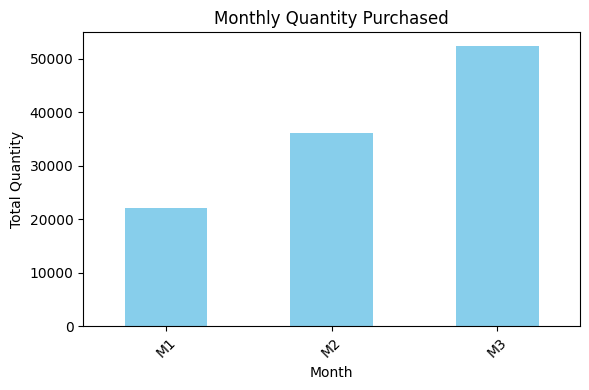

In [7]:
##MONTH WISE QUANTITY PURCHASED

# Group by month and sum the quantity-- chart representing
monthly_quantity = df.groupby(df['MONTH'])['QTY'].sum()
plt.figure(figsize=(6, 4))
monthly_quantity.plot(kind='bar', color='skyblue')
plt.title('Monthly Quantity Purchased')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Total Quantity')
plt.tight_layout()
plt.show()

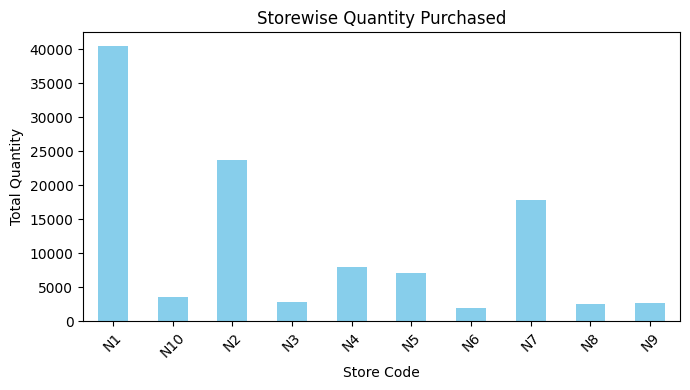

In [8]:
##STORE WISE QUANTITY PURCHASED

#Group by month and sum the quantity--- chart visualization
monthly_quantity = df.groupby(df['STORECODE'])['QTY'].sum()
plt.figure(figsize=(7, 4))
monthly_quantity.plot(kind='bar', color='skyblue')
plt.title('Storewise Quantity Purchased')
plt.xlabel('Store Code')
plt.xticks(rotation=45)
plt.ylabel('Total Quantity')
plt.tight_layout()
plt.show()

C:\Users\karni\AppData\Local\Temp\ipykernel_12668\1091908480.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


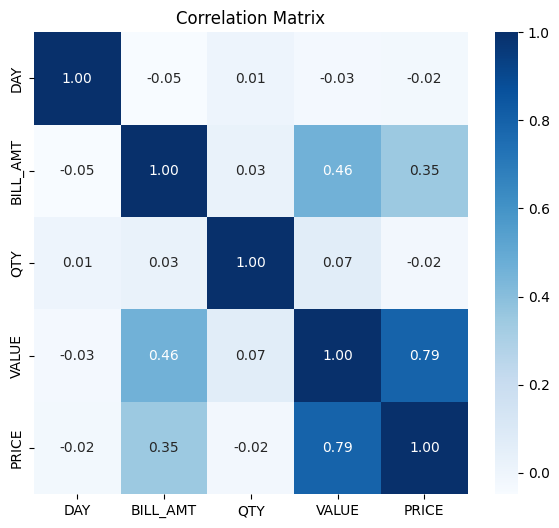

In [9]:
###CORRELATION MATRIX
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(7, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [10]:
###MOST PURCHASED ITEM 

#--grouping columns
item_quantity = df.groupby(['GRP', 'SGRP', 'SSGRP'])['QTY'].sum()

# Sort items by total quantity in descending order
item_quantity_sorted = item_quantity.sort_values(ascending=False)

#most purchase item display
most_purchased_item = item_quantity_sorted.index[0]
most_purchased_item = ' - '.join(most_purchased_item)
print("\nMost purchased item:\n", most_purchased_item)


Most purchased item:
 REFINED EDIBLE OILS-ALL PACKS - SUN FLOWER - SUN FLOWER


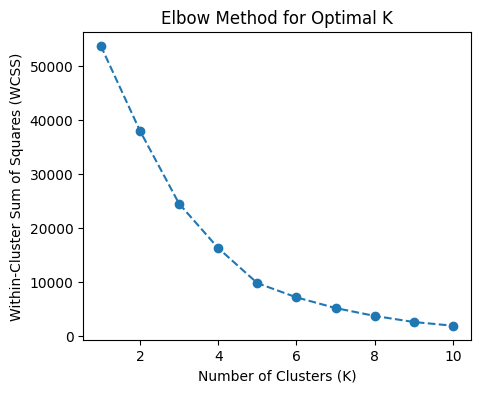

In [11]:
###CLUSTERING ANALYSIS

#df of num_cols alone
numeric_columns = ['QTY', 'VALUE']  
df_numeric = df[numeric_columns]
df_numeric = df_numeric.fillna(df_numeric.mean()) #missing val of num_cols

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_numeric)

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method to choose the optimal number of clusters
plt.figure(figsize=(5, 4))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

C:\Users\karni\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


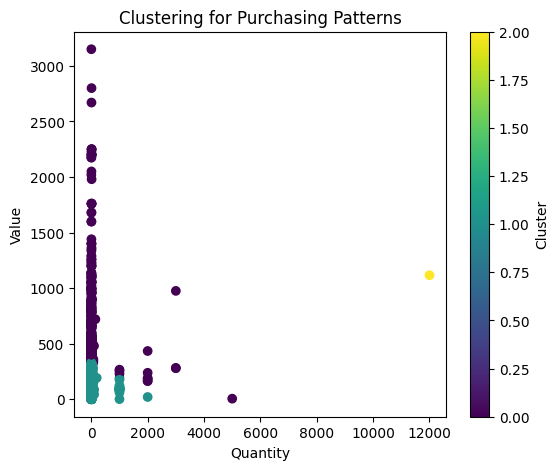

In [12]:
#optimal cluster
optimal_k = 3  
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize clusters
plt.figure(figsize=(6, 5))
plt.scatter(df['QTY'], df['VALUE'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Quantity')
plt.ylabel('Value')
plt.title('Clustering for Purchasing Patterns')
plt.colorbar(label='Cluster')
plt.show()

Cluster Counts:
1    26291
0      603
2        1
Name: Cluster, dtype: int64


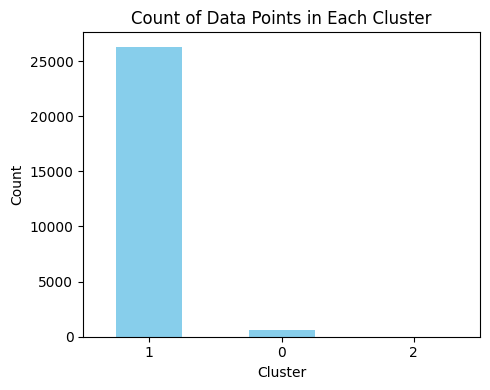

In [13]:
# Cluster Count printing
cluster_counts = df['Cluster'].value_counts()
print("Cluster Counts:")
print(cluster_counts)

# Visualizing bar chart for cluster count
plt.figure(figsize=(5, 4))
cluster_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Data Points in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      5379

    accuracy                           1.00      5379
   macro avg       1.00      1.00      1.00      5379
weighted avg       1.00      1.00      1.00      5379

Confusion Matrix:
[[5379]]


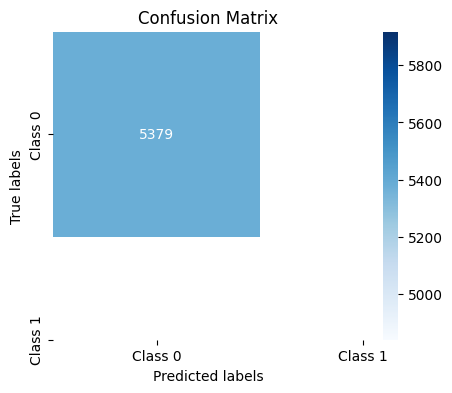

In [14]:

###RANDOM FOREST CLASSIFIER

#extra column binary col for detecting purchase
df['PurchaseDecision'] = df['QTY'].apply(lambda x: 1 if x > 0 else 0) 

X = df.drop(['PurchaseDecision', 'BILL_ID'], axis=1)  #target value
y = df['PurchaseDecision']

X_encoded = pd.get_dummies(X, columns=['MONTH', 'STORECODE', 'GRP', 'SGRP', 'SSGRP', 'CMP', 'MBRD', 'BRD'])

# datsset spliting
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train the model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Assuming y_pred and y_true are your predicted and true labels
conf_mat = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
